In [29]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.simplefilter('ignore')

%config InlineBackend.figue_format='svg'

In [3]:
df=pd.read_csv('/Users/Jeff/Downloads/telecom_churn.csv')

In [4]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

# Univariate Viz

<AxesSubplot:>

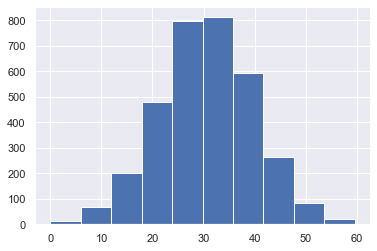

In [5]:
df['Total day charge'].hist()

In [6]:
features=['Total day charge','Total night charge']

array([[<AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total night charge'}>]],
      dtype=object)

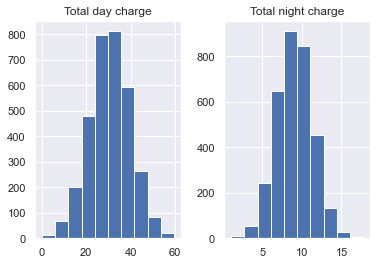

In [7]:
df[features].hist()

array([[<AxesSubplot:title={'center':'Total day charge'}>,
        <AxesSubplot:title={'center':'Total night charge'}>]],
      dtype=object)

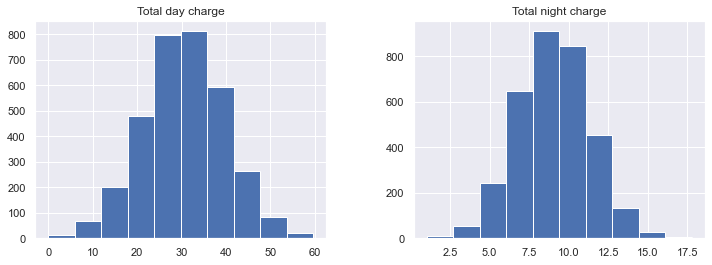

In [8]:
df[features].hist(figsize=(12,4))

<AxesSubplot:ylabel='Density'>

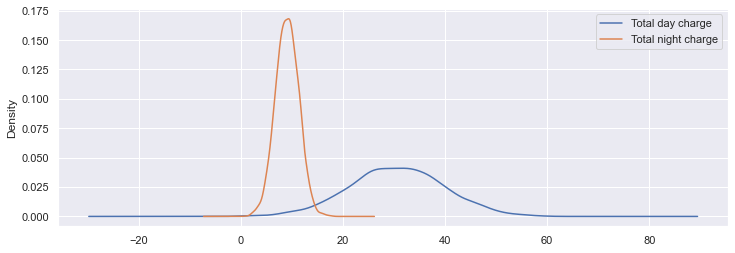

In [10]:
df[features].plot(kind='density', figsize=(12,4))

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

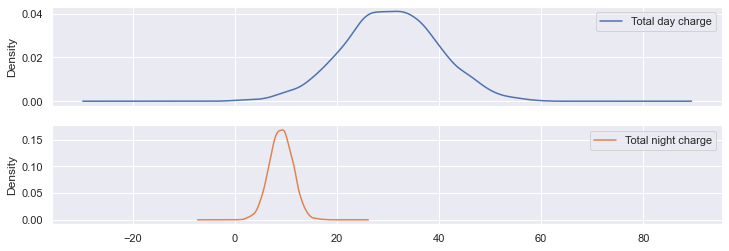

In [11]:
df[features].plot(kind='density', figsize=(12,4), subplots=True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

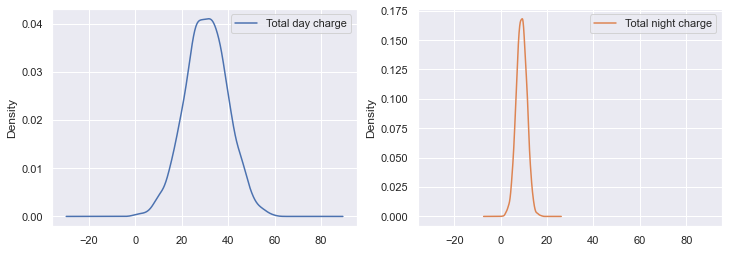

In [14]:
df[features].plot(kind='density', figsize=(12,4), subplots=True, layout=(1,2))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

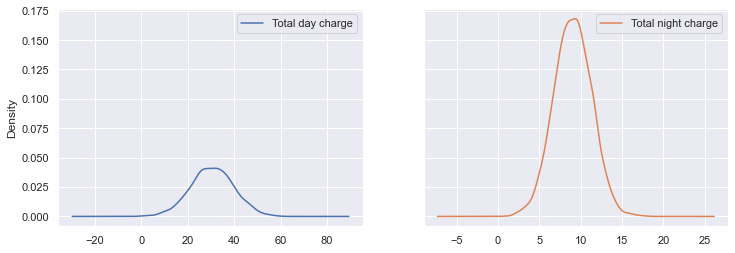

In [15]:
df[features].plot(kind='density', figsize=(12,4), subplots=True, layout=(1,2), sharey=True, sharex=False)

<AxesSubplot:xlabel='Total eve charge'>

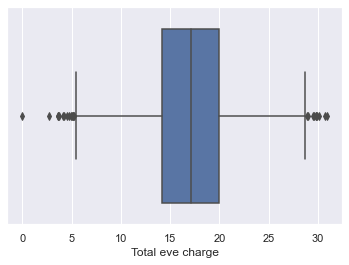

In [16]:
sns.boxplot(df['Total eve charge'])

<AxesSubplot:xlabel='Total eve charge'>

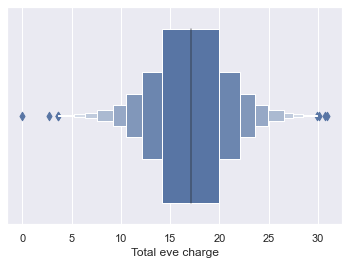

In [17]:
sns.boxenplot(df['Total eve charge'])

<AxesSubplot:xlabel='Total eve charge'>

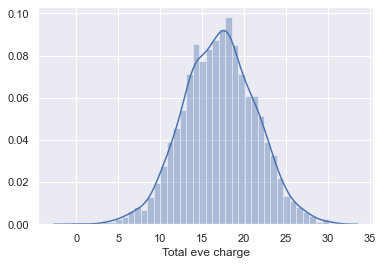

In [18]:
sns.distplot(df['Total eve charge'])

<AxesSubplot:xlabel='Total eve charge'>

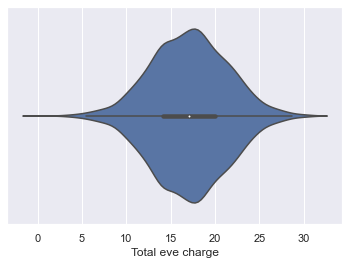

In [19]:
sns.violinplot(df['Total eve charge'])

<AxesSubplot:ylabel='Total eve charge'>

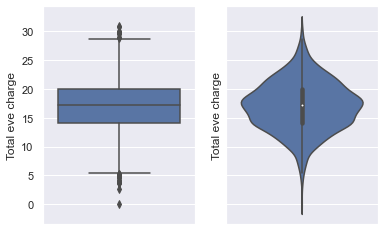

In [30]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))

sns.boxplot(y=df['Total eve charge'], ax=axes[0])
sns.violinplot(y=df['Total eve charge'], ax=axes[1])

In [27]:
df.Churn

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

<AxesSubplot:>

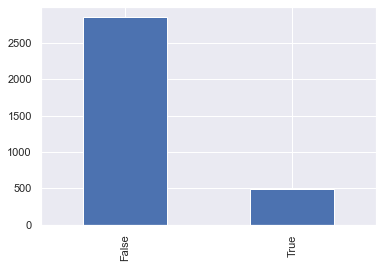

In [32]:
df.Churn.value_counts().plot.bar()

<AxesSubplot:>

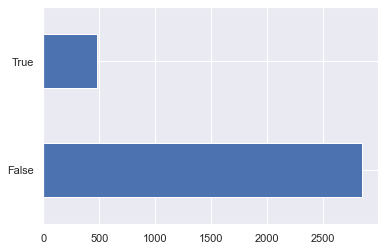

In [33]:
df.Churn.value_counts().plot.barh()

<AxesSubplot:>

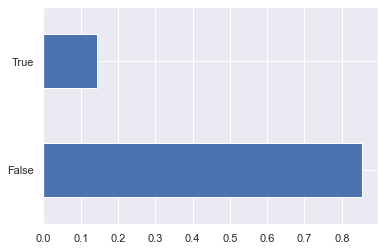

In [34]:
df.Churn.value_counts(normalize=True).plot.barh()

<AxesSubplot:xlabel='Churn', ylabel='count'>

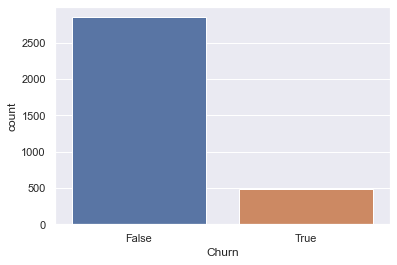

In [35]:
sns.countplot(df.Churn)

<AxesSubplot:>

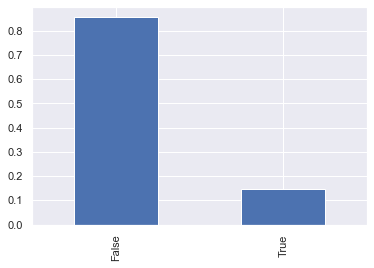

In [36]:
df.Churn.value_counts(normalize=True).plot(kind='bar', stacked=True)

In [37]:
features = ['Churn','Customer Service calls']

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

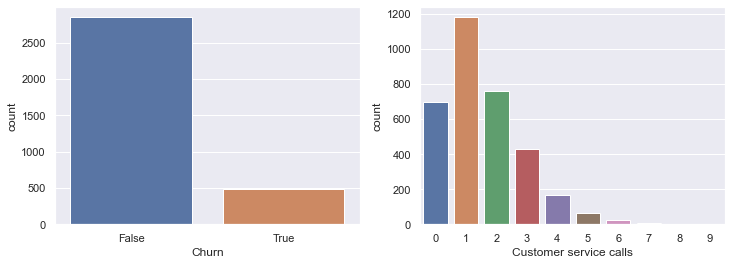

In [41]:
_, axes = plt.subplots(1,2, sharey=False, figsize=(12,4))

sns.countplot(df['Churn'], ax=axes[0])
sns.countplot(df['Customer service calls'], ax=axes[1])

# Multivariate Viz

<AxesSubplot:>

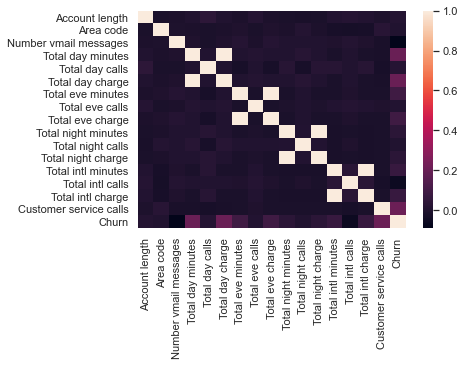

In [42]:
sns.heatmap(df.corr())

<AxesSubplot:>

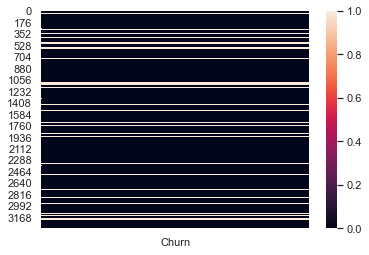

In [43]:
sns.heatmap(df[['Churn']])

<AxesSubplot:>

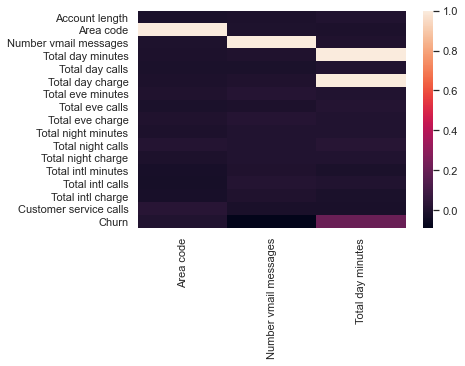

In [44]:
sns.heatmap(df.corr().iloc[:, 1:4])

In [48]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

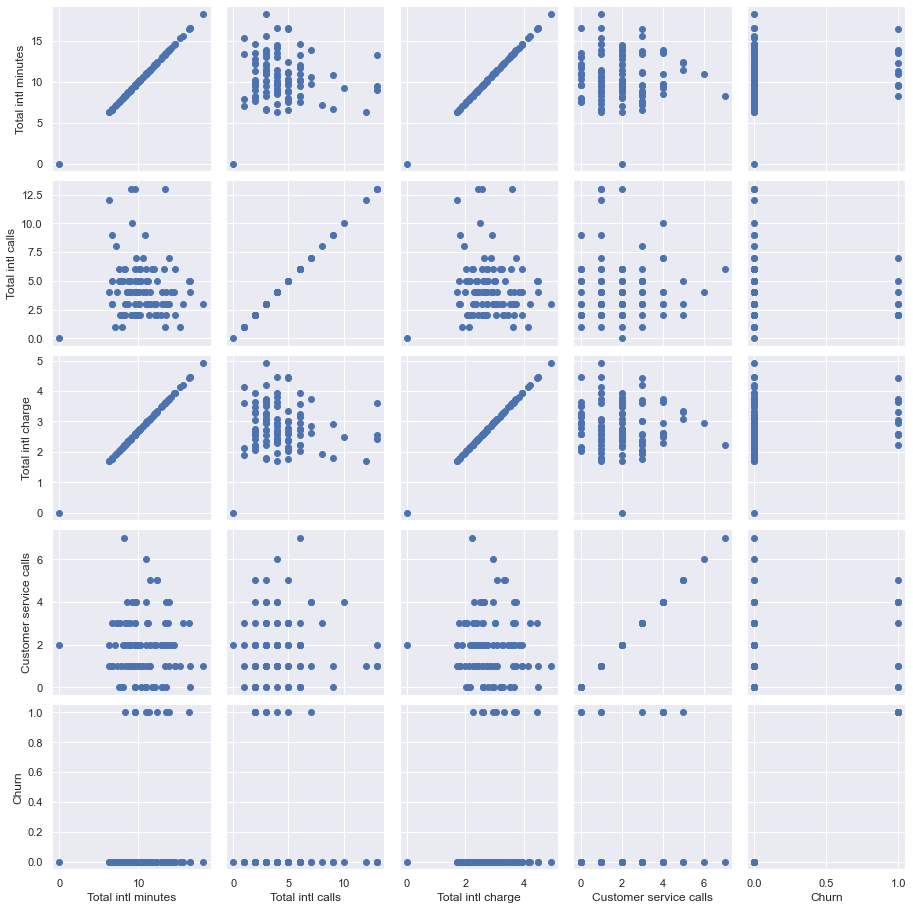

In [49]:
g=sns.PairGrid(df.iloc[:, -5:].sample(100))
g.map(plt.scatter)

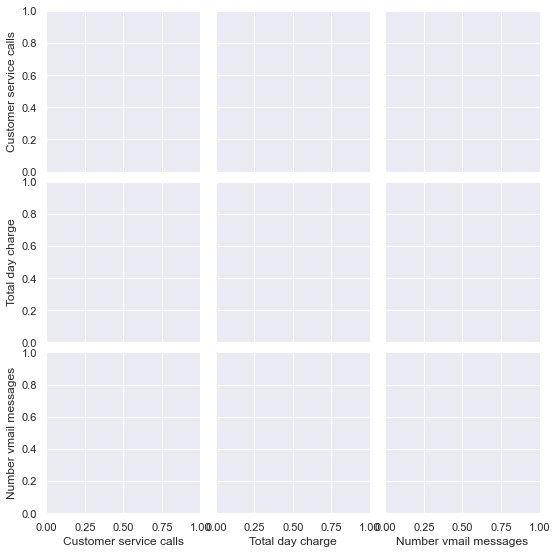

In [51]:
g=sns.PairGrid(df[['Customer service calls', 'Total day charge', 'Number vmail messages','Area code']], hue='Area code')

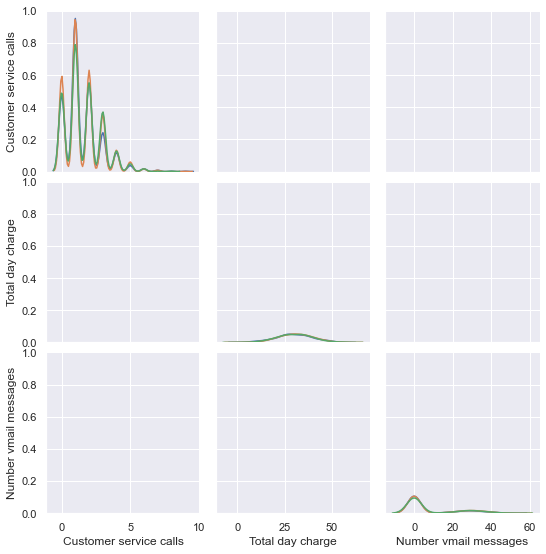

In [52]:
g.map_diag(sns.kdeplot)

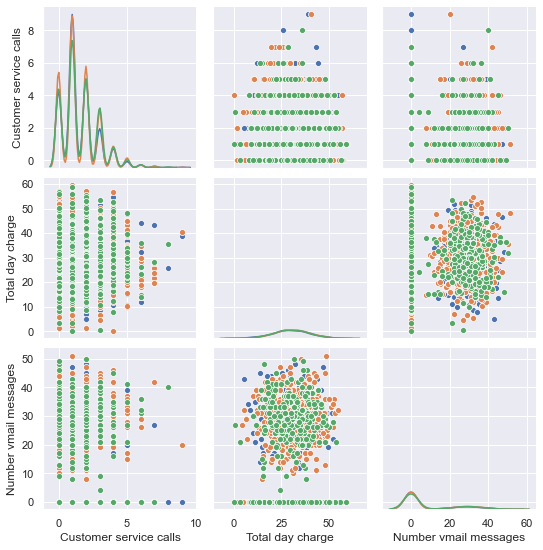

In [53]:
g.map_offdiag(sns.scatterplot)

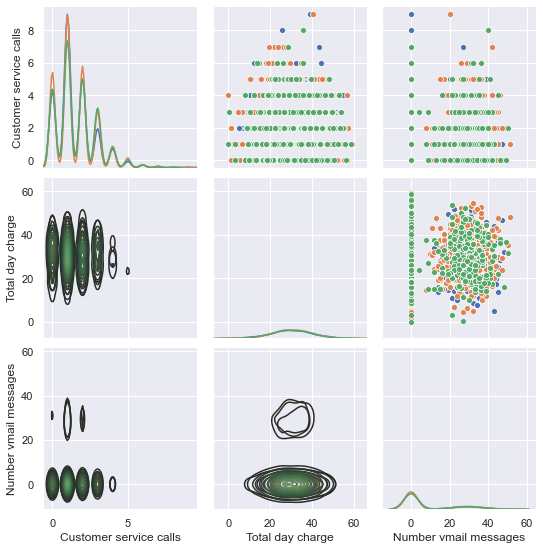

In [54]:
g=sns.PairGrid(df[['Customer service calls', 'Total day charge', 'Number vmail messages','Area code']], hue='Area code')
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

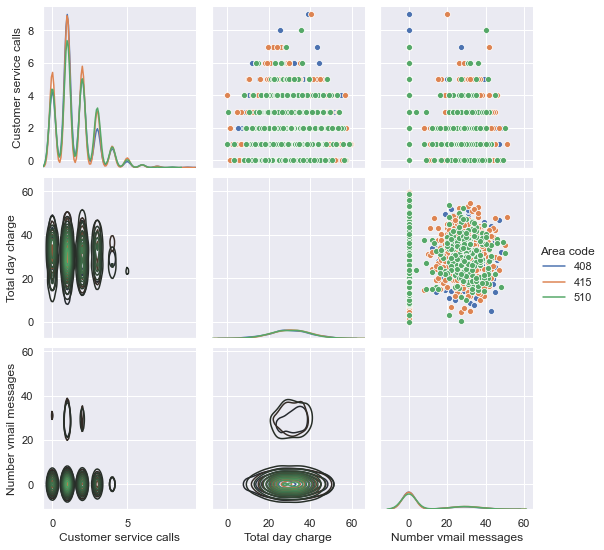

In [55]:
g=sns.PairGrid(df[['Customer service calls', 'Total day charge', 'Number vmail messages','Area code']], hue='Area code')
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()

<AxesSubplot:xlabel='Total day calls', ylabel='Customer service calls'>

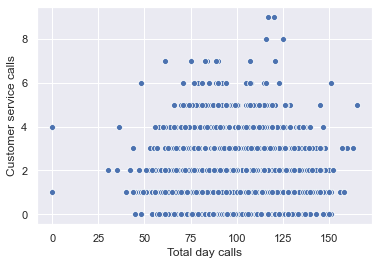

In [56]:
sns.scatterplot(df['Total day calls'], df['Customer service calls'])

<AxesSubplot:xlabel='Total day minutes', ylabel='Total day charge'>

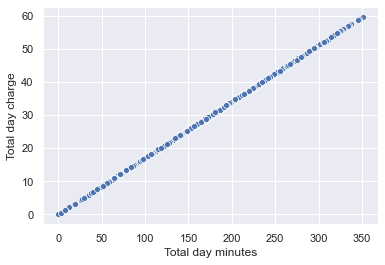

In [57]:
sns.scatterplot(df['Total day minutes'], df['Total day charge'])

<AxesSubplot:xlabel='Total day minutes'>

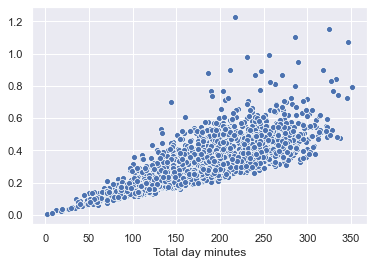

In [58]:
sns.scatterplot(df['Total day minutes'], df['Total day charge']/df['Total day calls'])

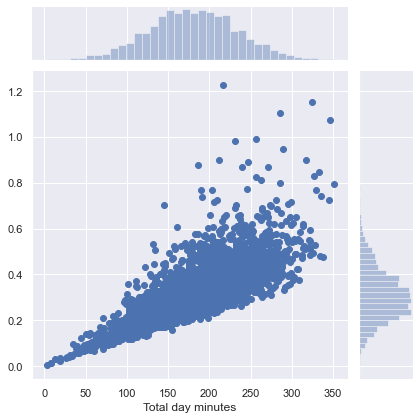

In [59]:
sns.jointplot(df['Total day minutes'], df['Total day charge']/df['Total day calls'])

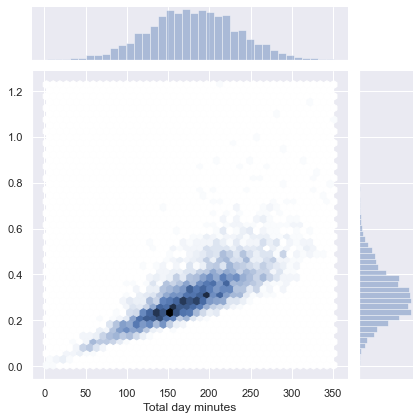

In [60]:
sns.jointplot(df['Total day minutes'], df['Total day charge']/df['Total day calls'], kind='hex')

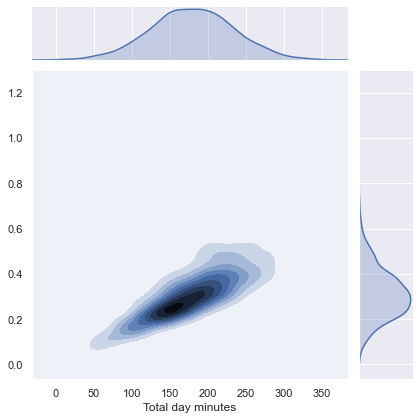

In [61]:
sns.jointplot(df['Total day minutes'], df['Total day charge']/df['Total day calls'], kind='kde')

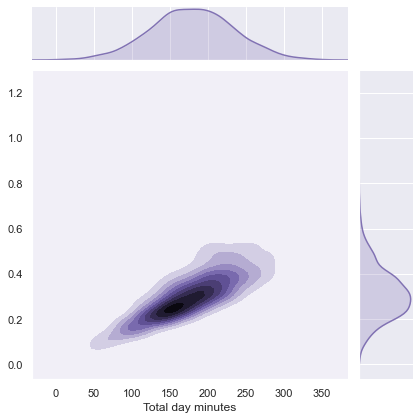

In [62]:
sns.jointplot(df['Total day minutes'], df['Total day charge']/df['Total day calls'], kind='kde', color='m')

<AxesSubplot:xlabel='Customer service calls'>

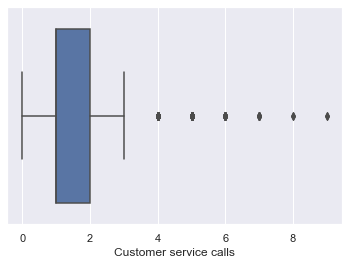

In [66]:
sns.boxplot('Customer service calls', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Customer service calls'>

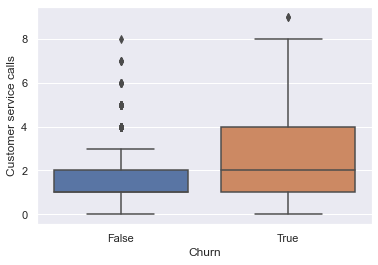

In [65]:
sns.boxplot('Churn','Customer service calls', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Total intl calls'>

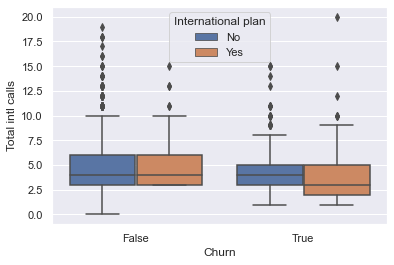

In [67]:
sns.boxplot('Churn', y='Total intl calls', data=df, hue='International plan')

<AxesSubplot:xlabel='Churn', ylabel='Total intl charge'>

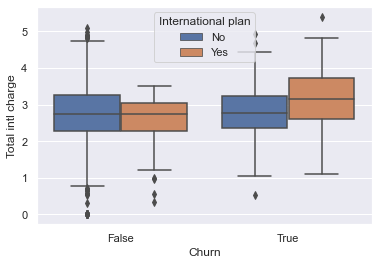

In [68]:
sns.boxplot('Churn', y='Total intl charge', data=df, hue='International plan')

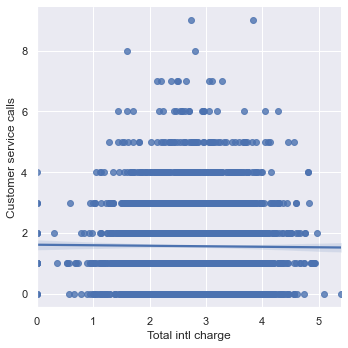

In [69]:
sns.lmplot(data=df, x='Total intl charge', y='Customer service calls')

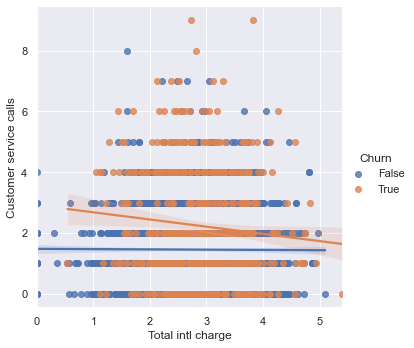

In [70]:
sns.lmplot(data=df, x='Total intl charge', y='Customer service calls', hue='Churn')

In [72]:
num_features=df._get_numeric_data().columns.drop('Area code')

IndexError: index 5 is out of bounds for axis 0 with size 5

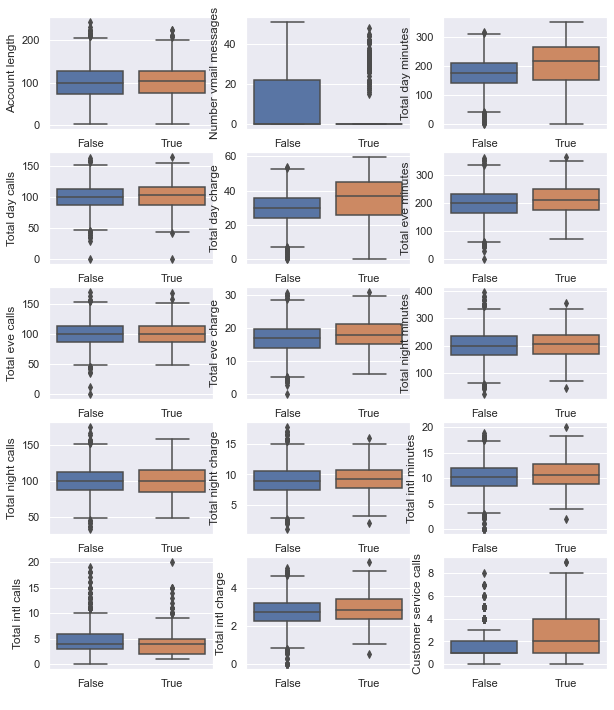

In [73]:
fig, axes=plt.subplots(5,3, figsize=(10,12))
for idx, feature in enumerate(num_features):
    ax=axes[idx//3,idx%3]
    sns.boxplot(x='Churn', y=feature, data=df, ax=ax)
    ax.set_xlabel(' ')
    ax.set_ylabel(feature)
fig.tight_layout()

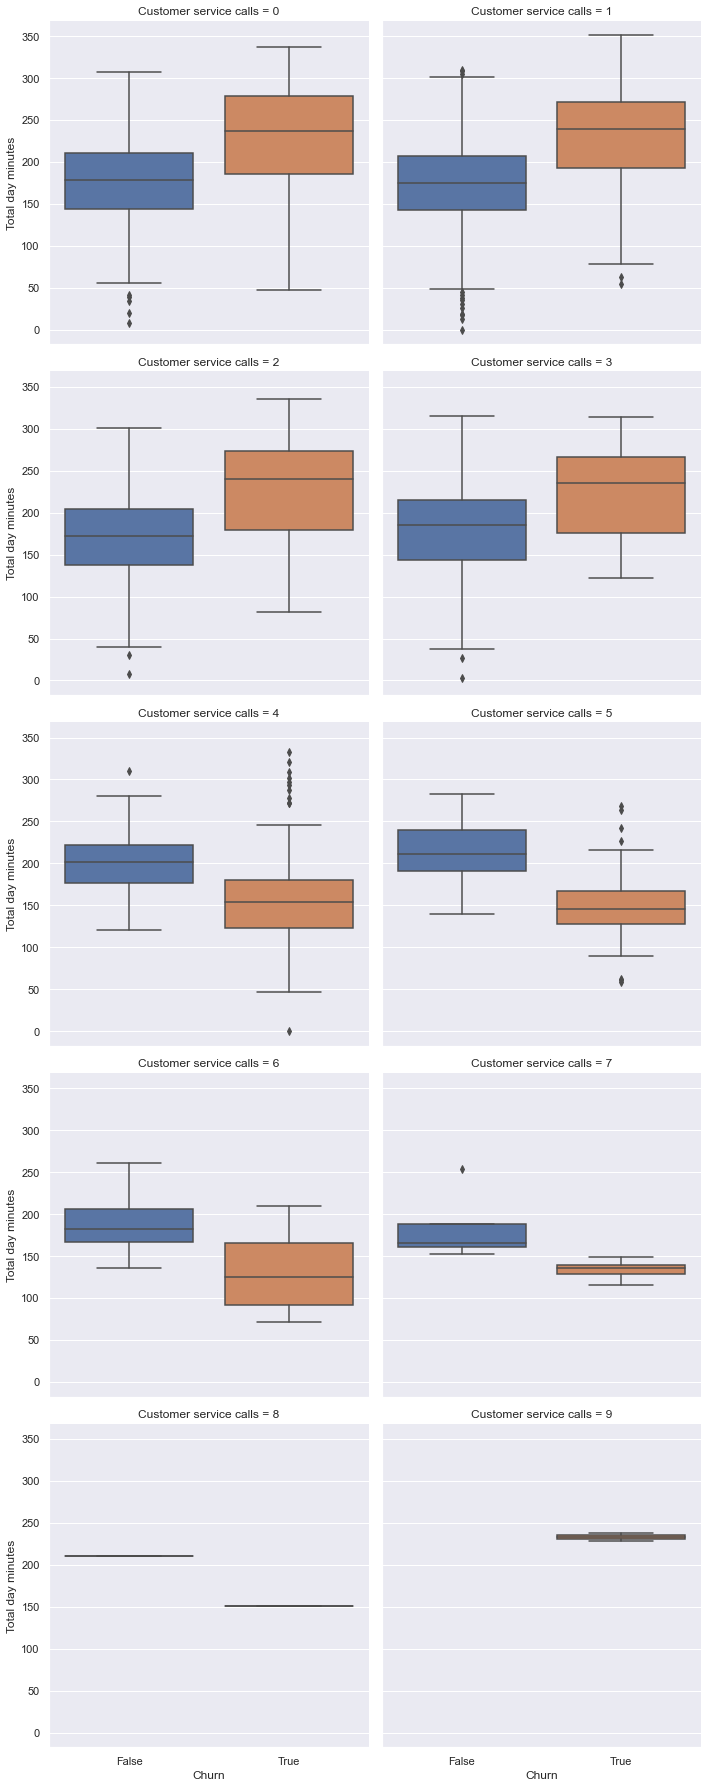

In [74]:
sns.factorplot(data=df, x='Churn', kind='box', y='Total day minutes', col='Customer service calls', col_wrap=2, size=5)

<AxesSubplot:xlabel='Customer service calls', ylabel='Total intl charge'>

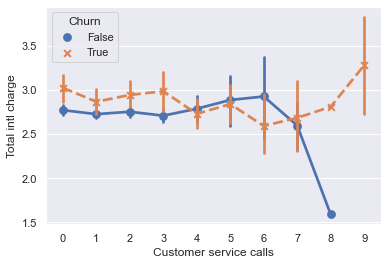

In [75]:
sns.pointplot(x='Customer service calls', y='Total intl charge', hue='Churn', data=df, markers=['o','x'], linestyles=['-','--'])

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

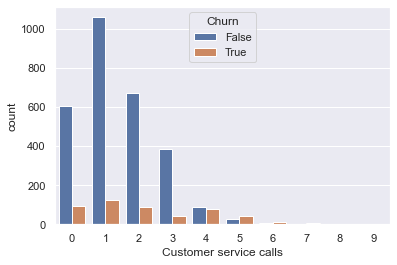

In [76]:
sns.countplot(data=df, x='Customer service calls', hue='Churn')

TypeError: 'NoneType' object is not iterable

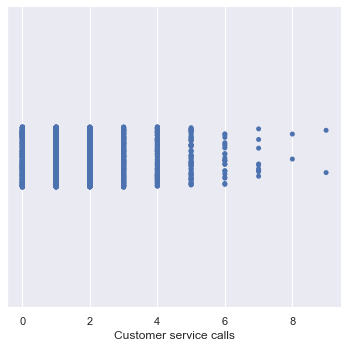

In [77]:
sns.catplot(data=df, x='Customer service calls', hue='Churn')

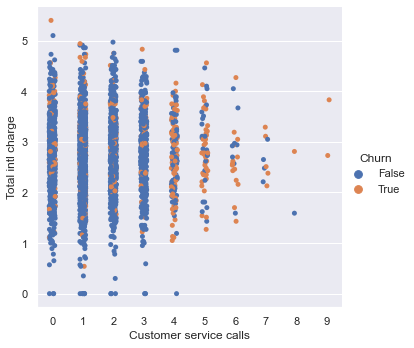

In [78]:
sns.catplot(data=df, x='Customer service calls', hue='Churn', y='Total intl charge')

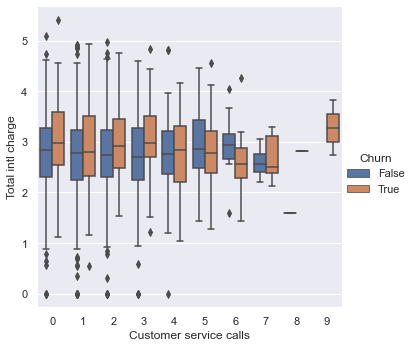

In [79]:
sns.catplot(data=df, x='Customer service calls', hue='Churn', y='Total intl charge', kind='box')

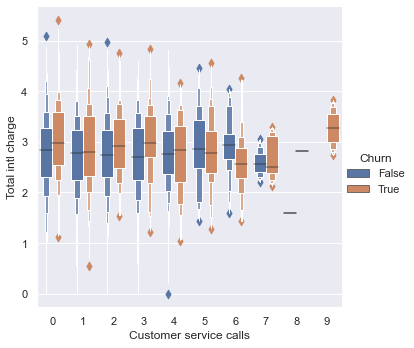

In [80]:
sns.catplot(data=df, x='Customer service calls', hue='Churn', y='Total intl charge', kind='boxen')

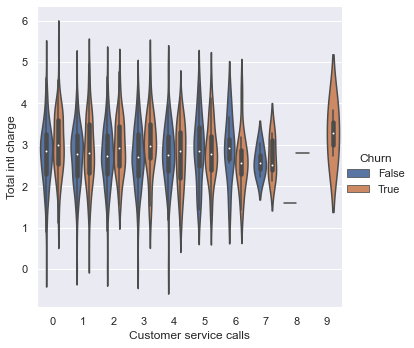

In [82]:
sns.catplot(data=df, x='Customer service calls', hue='Churn', y='Total intl charge', kind='violin')

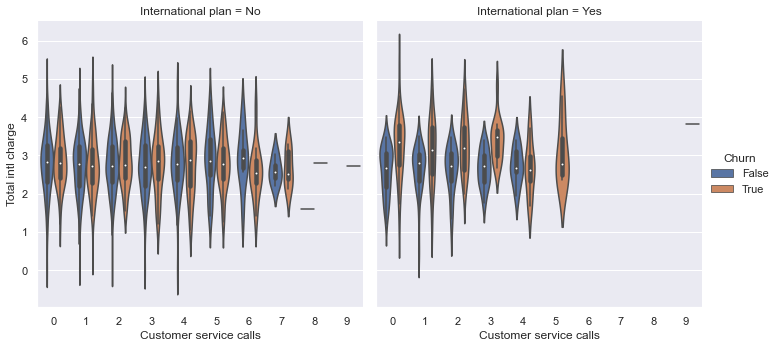

In [83]:
sns.catplot(data=df, x='Customer service calls', hue='Churn', y='Total intl charge', kind='violin', col='International plan')

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

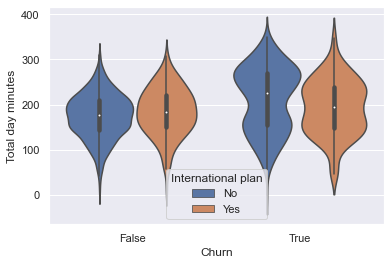

In [86]:
sns.violinplot(data=df, x='Churn', y='Total day minutes', hue='International plan')

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

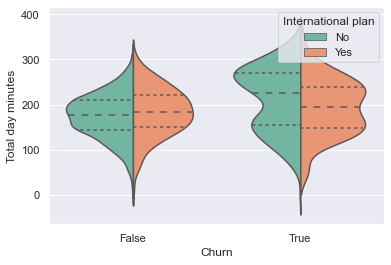

In [87]:
sns.violinplot(data=df, x='Churn', y='Total day minutes', hue='International plan', split=True, palette='Set2', inner='quartile')

In [88]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [89]:
x=df.drop(['State'], axis=1).copy()

In [91]:
dct={'No':0, 'Yes':1}

In [93]:
x['International plan']=x['International plan'].map(dct)

In [95]:
x['Voice mail plan']=x['Voice mail plan'].map(dct)

In [97]:
x.Churn

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [99]:
pip install sklearn

     |████████████████████████████████| 7.2 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 1.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=77172b8fbda40dccaba59ce08958785a72f53173cee48891d00dcac33811c49a
  Stored in directory: /Users/Jeff/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [102]:
tsne=TSNE(random_state=11)
x_tsne=tsne.fit_transform(x_scaled)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [105]:
pd.options.plotting.backend='plotly'

In [104]:
pip install plotly

     |████████████████████████████████| 13.0 MB 4.2 MB/s eta 0:00:01    |▋                               | 225 kB 2.4 MB/s eta 0:00:06     |███████▉                        | 3.2 MB 2.4 MB/s eta 0:00:05     |██████████████████████▋         | 9.2 MB 5.3 MB/s eta 0:00:01     |███████████████████████▉        | 9.7 MB 5.3 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=f4f190e13f51a826b30aadec0fb21d71ef67f49027cee1479fc10de58e4d3f42
  Stored in directory: /Users/Jeff/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [107]:
df['Total intl calls'].hist()

In [108]:
df['Churn'].plot.bar()

In [109]:
pip install plotly --user --upgrade

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [110]:
pip install plotly-express --user

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
